# K-Means
In this notebook we generate anchor boxes using k-means on the dataset. All the bounding boxes' w and h must be loaded in the numpy array. We use script generated CSV files which has fields w and h.

K-means used in this notebook is based on idea of using mini batches of dataset. We also plot k vs avgIOU to show that avgIOU increases if we increase number of anchor boxes used in the model. 


## Algorithm for K-means 

<img src="notebook_images/kmeans.png" width="500px"></img>

We used distance function as mentioned in YoloV2

distance(centroid,box) = 1 - IoU(centroid, box)

In [1]:
from config import Configuration
import pandas as pd
import numpy as np
from util import cvt_coord_to_diagonal, intersection_over_union, cvt_coord_to_mid_point
import matplotlib.pyplot as plt
from k_means import KMeans
from mini_batch_kmeans import MiniBatchKMeans
from matplotlib import rc
%matplotlib qt5
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 20}
rc('font', **font)

In [21]:
leaf_train_data = pd.read_csv('annotation_data/train_leaf_data_v2.csv')
leaf_train_data.head(10)

,image_path,label,xmin,ymin,xmax,ymax,xc,yc,w,h
0,.\data\leaf_data_v2\train\leaf_infected_0.jpg,infected,0.579291,0.002809,0.850047,0.466643,0.714669,0.234726,0.270756,0.463834
1,.\data\leaf_data_v2\train\leaf_infected_0.jpg,infected,0.208256,0.718048,0.333022,1.000000,0.270639,0.859024,0.124767,0.281952
2,.\data\leaf_data_v2\train\leaf_infected_0.jpg,infected,0.163013,0.046348,0.268424,0.314607,0.215718,0.180478,0.105410,0.268258
3,.\data\leaf_data_v2\train\leaf_infected_0.jpg,infected,0.127799,0.583919,0.230877,0.795646,0.179338,0.689782,0.103078,0.211728
4,.\data\leaf_data_v2\train\leaf_infected_0.jpg,infected,0.334188,0.548806,0.460588,0.660463,0.397388,0.604635,0.126399,0.111657
5,.\data\leaf_data_v2\train\leaf_infected_0.jpg,infected,0.458489,0.468750,0.521455,0.639045,0.489972,0.553897,0.062966,0.170295
6,.\data\leaf_data_v2\train\leaf_infected_0.jpg,infected,0.295243,0.152739,0.401819,0.294593,0.348531,0.223666,0.106576,0.141854
7,.\data\leaf_data_v2\train\leaf_infected_0.jpg,infected,0.488806,0.204003,0.614039,0.321980,0.551423,0.262992,0.125233,0.117978
8,.\data\leaf_data_v2\train\leaf_infected_0.jpg,infected,0.895289,0.145365,0.988573,0.614817,0.941931,0.380091,0.093284,0.469452
9,.\data\leaf_data_v2\train\leaf_infected_0.jpg,infected,0.000233,0.805478,0.099580,0.936096,0.049907,0.870787,0.099347,0.130618


In [22]:
k_vs_iou_data = []

Data has been fitted
 AvgError: 0.4002574090363715, AvgIou: 0.5997425909636285


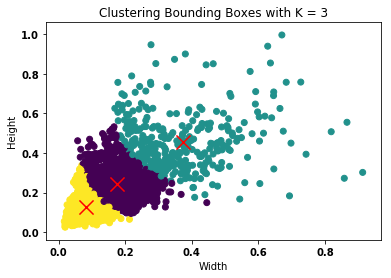

In [23]:
K = 3
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = leaf_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data,iteration_hist=False)
k_vs_iou_data.append((K,avg_iou))

cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

In [24]:
k_means.cluster_vectors

array([[0.17624328, 0.24236779],
       [0.37276269, 0.45698693],
       [0.08319901, 0.12498929]])

Data has been fitted
 AvgError: 0.33743291549255905, AvgIou: 0.662567084507441


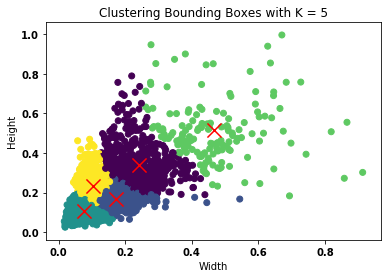

In [25]:
K = 5
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = leaf_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data,iteration_hist=False)
k_vs_iou_data.append((K,avg_iou))

cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

In [26]:
k_means.cluster_vectors

array([[0.24239358, 0.33884183],
       [0.17327878, 0.1666482 ],
       [0.07727023, 0.10444576],
       [0.46670855, 0.51615248],
       [0.10260805, 0.23255115]])

Data has been fitted
 AvgError: 0.3012139234507732, AvgIou: 0.6987860765492269


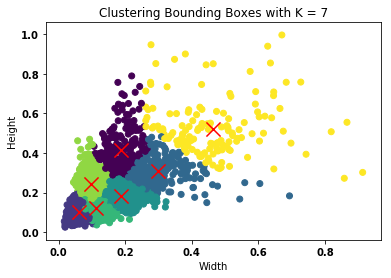

In [27]:
K = 7
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = leaf_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data,iteration_hist=False)
k_vs_iou_data.append((K,avg_iou))

cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

In [28]:
k_means.cluster_vectors

array([[0.18610209, 0.41656246],
       [0.06074322, 0.1025629 ],
       [0.29759804, 0.31012471],
       [0.18809654, 0.18385709],
       [0.11337662, 0.12032984],
       [0.09884605, 0.24542725],
       [0.46422022, 0.52126711]])

Data has been fitted
 AvgError: 0.2771692853953413, AvgIou: 0.7228307146046588


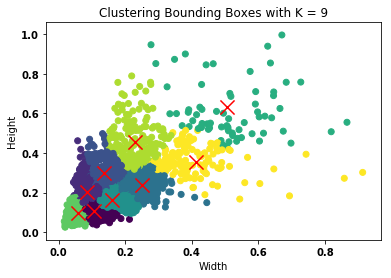

In [29]:
K = 9
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = leaf_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data,iteration_hist=False)
k_vs_iou_data.append((K,avg_iou))

cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

Data has been fitted
 AvgError: 0.25661398491005066, AvgIou: 0.7433860150899493


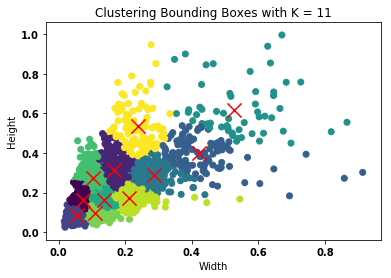

In [30]:
K = 11
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = leaf_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data,iteration_hist=False)
k_vs_iou_data.append((K,avg_iou))

cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

Data has been fitted
 AvgError: 0.24238755382699437, AvgIou: 0.7576124461730056


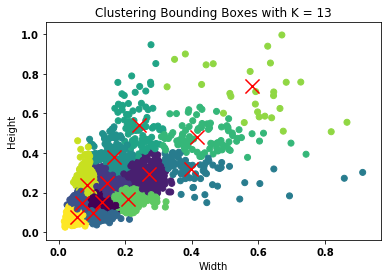

In [31]:
K = 13
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = leaf_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data,iteration_hist=False)
k_vs_iou_data.append((K,avg_iou))

cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

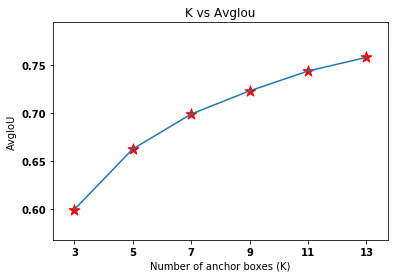

In [32]:
k_vs_iou_data = np.array(k_vs_iou_data)
plt.xlabel('Number of anchor boxes (K)')
plt.ylabel('AvgIoU')
plt.xticks(ticks=k_vs_iou_data[:,0])
plt.title('K vs AvgIou')
plt.scatter(k_vs_iou_data[:,0],k_vs_iou_data[:,1],c='r',marker='*',s=128)
plt.plot(k_vs_iou_data[:,0],k_vs_iou_data[:,1])

In [33]:
k_vs_iou_data

array([[ 3.        ,  0.59974259],
       [ 5.        ,  0.66256708],
       [ 7.        ,  0.69878608],
       [ 9.        ,  0.72283071],
       [11.        ,  0.74338602],
       [13.        ,  0.75761245]])